# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd


Please import the fifa.csv dataset and assign it to a variable called fifa.

In [9]:
# Your code here:
fifa=pd.read_csv('fifa.csv')
#fifa.head()

Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [16]:
fifa['ValueNumericc'] = fifa['Value'].str.replace('€', '').str.replace('M', '').str.replace('K', '').astype(float)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumericc
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


In [63]:
# to count the players based on nationality
fifa['Nationality'].groupby(fifa['Nationality']).count()

Nationality
Afghanistan      4
Albania         39
Algeria         60
Andorra          1
Angola          15
              ... 
Uzbekistan       2
Venezuela       59
Wales          128
Zambia           9
Zimbabwe        13
Name: Nationality, Length: 163, dtype: int64

# Challenge 1 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [26]:
# Your code here:
#fifa.isnull().sum()


In [24]:
fifa.dropna(axis=0, inplace=True)

In [25]:
fifa.isnull().sum()


Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumericc     0
dtype: int64

In [28]:
#fifa.info()

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [37]:
# low stamina means he will get tired quickly
# sprint speed, is the speed from zero.
import statsmodels.api as sm

Y=fifa['SprintSpeed']
X=fifa[['Strength', 'Age']]
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SprintSpeed   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     221.0
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.60e-95
Time:                        20:58:33   Log-Likelihood:                -73325.
No. Observations:               17918   AIC:                         1.467e+05
Df Residuals:                   17915   BIC:                         1.467e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.5039      0.709    110.731      0.000      77.114      79.894
Strength      -0.0443      0.009     -4.836      0.000      -0.062      -0.026
Age           -0.4338      0.025    -17.656      0.000      -0.482      -0.386
==============================================================================
Omnibus:                     1889.069   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2607.038
Skew:                          -0.847   Prob(JB):                         0.00
Kurtosis:                       3.788   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
Y=fifa['Stamina']
X=fifa[['Potential','Aggression','Acceleration']]
X=sm.add_constant(X)
model=sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Stamina   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:04:08   Log-Likelihood:                -66104.
No. Observations:               17918   AIC:                         1.322e+05
Df Residuals:                   17914   BIC:                         1.322e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.5125      0.854      4.114   

In [36]:
#Y_pred=model.predict(X)

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [42]:
# Your code here:
Y=fifa['Potential']
X=fifa[['Age', 'Strength', 'Vision']]
X=sm.add_constant(X)
model=sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Potential   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     2261.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:10:28   Log-Likelihood:                -55078.
No. Observations:               17918   AIC:                         1.102e+05
Df Residuals:                   17914   BIC:                         1.102e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.3208      0.286    235.138      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

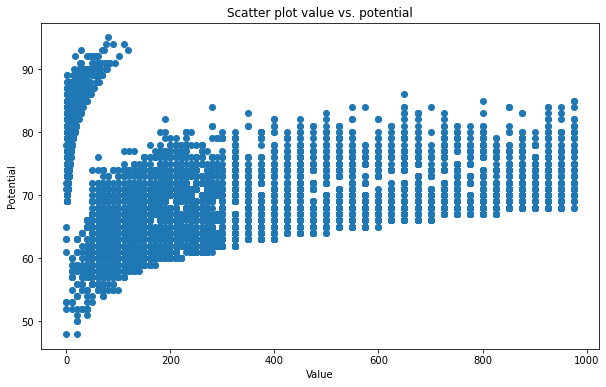

In [51]:
# Your code here:
import matplotlib.pyplot as plt 
plt.figure(figsize = (10,6))
plt.scatter(y=fifa['Potential'], x=fifa['ValueNumericc'])
plt.title('Scatter plot value vs. potential')
plt.xlabel('Value')
plt.ylabel('Potential')
plt.show()

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Run an appropriate linear regression and careful how you include the variable! Please comment on your results.



In [1]:
# Your code here:


Finally, we would like to see the impact of a player's nationality on their value. Run an appropriate linear regression and comment on your results.

In [2]:
# Your code here:

Y=fifa['ValueNumericc']
X=
